# Customer Segmentation Using K-Means Clustering

## Problem Statement and Objective
The goal of this project is to perform customer segmentation using **unsupervised learning (K-Means clustering)** on mall customer data. By analyzing customer demographics, income, and spending habits, we aim to group customers into meaningful clusters and suggest targeted marketing strategies for each segment.


## 1. Importing Required Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples




## 2. Loading and Exploring the Data

In [20]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Data Preprocessing
We remove irrelevant columns and scale the features to prepare for clustering.

In [21]:
df = df.rename(columns={
    "Age": "Age",
    "Annual Income (k$)": "Annual_Income",
    "Spending Score (1-100)": "Spending_Score"
})
df = df.drop(columns= ['CustomerID', 'Gender'])
df.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [22]:
sc = StandardScaler()
scaled_features = sc.fit_transform(df)
scaled_features

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

## 4. Exploratory Data Analysis (EDA)
Visualizing distributions of Age, Annual Income, and Spending Score.

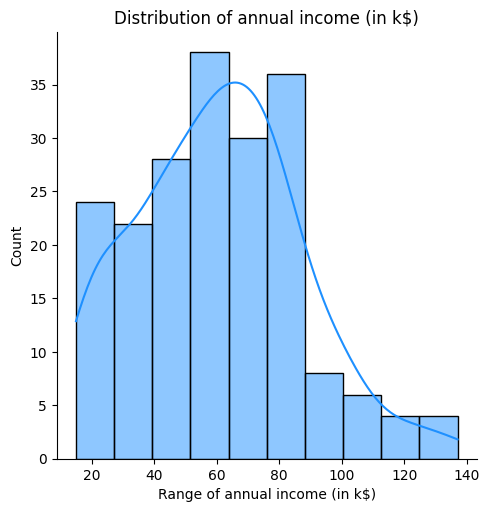

In [23]:

sns.displot(df["Annual_Income"], kde = True, color="dodgerblue")
plt.title("Distribution of annual income (in k$)")
plt.xlabel("Range of annual income (in k$)")
plt.ylabel("Count")

plt.show()

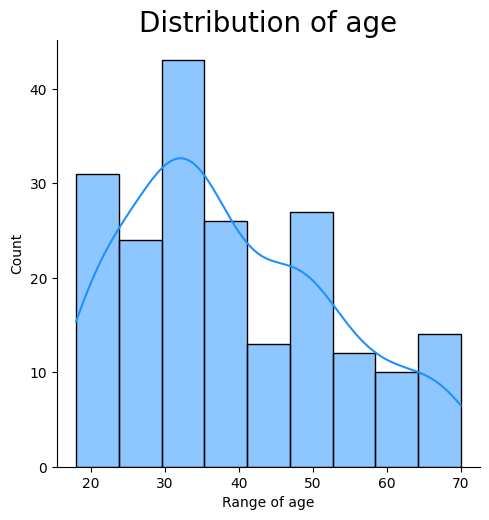

In [24]:
sns.displot(df["Age"], kde=True, color="dodgerblue")

plt.title('Distribution of age', fontsize = 20)
plt.xlabel('Range of age')
plt.ylabel('Count')

plt.show()

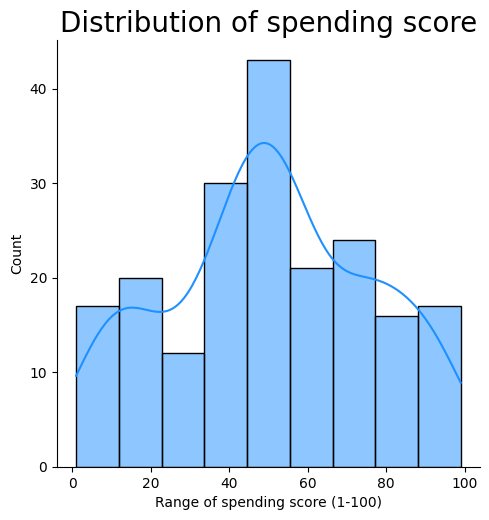

In [25]:
sns.displot(df["Spending_Score"], kde=True, color="dodgerblue")

plt.title('Distribution of spending score', fontsize = 20)
plt.xlabel('Range of spending score (1-100)')
plt.ylabel('Count')

plt.show()

## 5. Selecting Features for Clustering
We will focus on **Annual Income** and **Spending Score**, as these directly relate to customer purchasing patterns.


In [26]:
X_scaled = scaled_features[:, [1, 2]] 
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

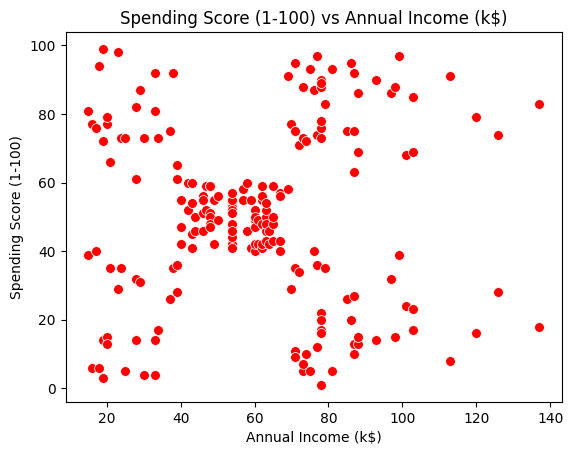

In [27]:
# scatterplot of the above data
sns.scatterplot(x="Annual_Income", y="Spending_Score", data=df, s=50, color="red")

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')

plt.show()

## 6. Determining the Optimal Number of Clusters

6.1 Elbow Method

We compute the Within-Cluster-Sum-of-Squares (WCSS) for different values of `k`.

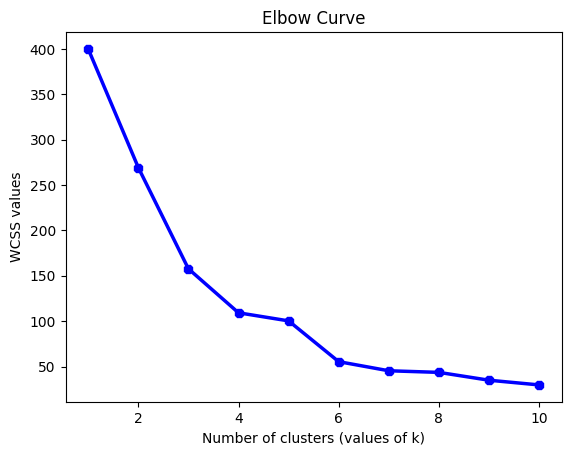

In [28]:
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, n_init="auto")
    k_means.fit(X_scaled)
    wcss.append(k_means.inertia_)
    

plt.plot(range(1, 11), wcss, linewidth=2.5, color="blue", marker="8")

plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")


plt.show()

**Observation:**  
The elbow appears around **k = 5**, suggesting that 5 clusters is a reasonable choice.

### 6.2 Silhouette Analysis
Silhouette score evaluates cluster quality. Higher scores indicate better-defined clusters.

K=2, Silhouette Score=0.397
K=3, Silhouette Score=0.467
K=4, Silhouette Score=0.494
K=5, Silhouette Score=0.555
K=6, Silhouette Score=0.514
K=7, Silhouette Score=0.502
K=8, Silhouette Score=0.455
K=9, Silhouette Score=0.457
K=10, Silhouette Score=0.445


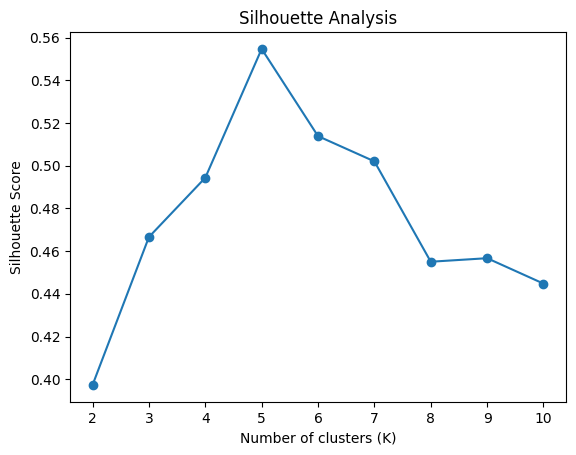

In [29]:
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)
    print(f"K={k}, Silhouette Score={score:.3f}")

plt.plot(range(2, 11), scores, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

**Observation:**  
The highest silhouette score is for **K = 5**, which confirms the elbow method.

## 7. Applying K-Means Clustering

In [30]:
k_means = KMeans(n_clusters=5, n_init= "auto")
k_means.fit(X_scaled)
y_pred = k_means.predict(X_scaled)

df["label"] = y_pred

df.head()

,Age,Annual_Income,Spending_Score,label
0,19,15,39,3
1,21,15,81,4
2,20,16,6,3
3,23,16,77,4
4,31,17,40,3


## 8. Visualizing the Clusters

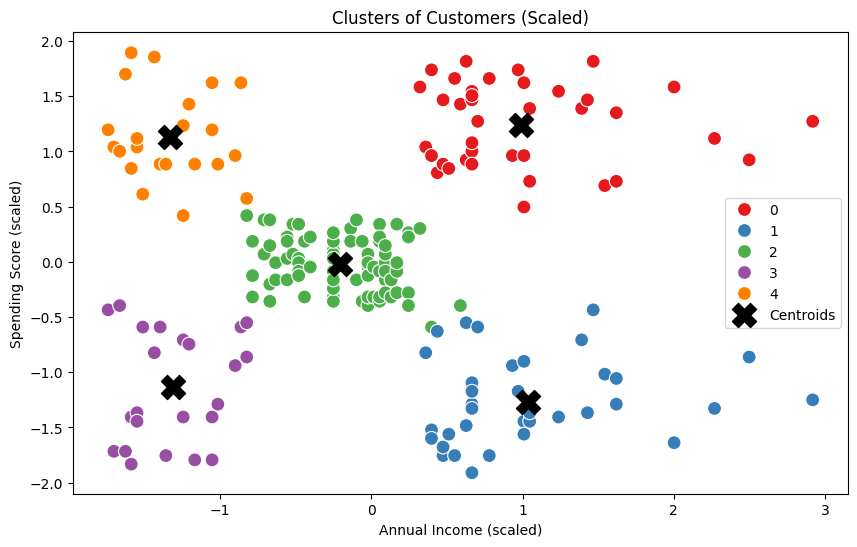

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=df['label'], palette="Set1", s=100)

# Plot centroids (already in scaled space)
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], s=300, c='black', marker='X', label='Centroids')

plt.title("Clusters of Customers (Scaled)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()

## 9. Insights from Clusters

1. **Cluster 0 (Red)**: Average income, low spending → Potential to upsell. 
2. **Cluster 1 (Blue)**: Low income, high spending → Young, enthusiastic buyers. 
3. **Cluster 2 (Green)**: Low income, low spending → Budget-conscious customers.  
4. **Cluster 3 (Purple)**: High income, high spending → Premium segment, loyal customers.  
5. **Cluster 4 (Gold)**: High income, low spending → High potential for targeted marketing campaigns.


## 10. Conclusion
- K-Means clustering is effective for segmenting mall customers based on income and spending behavior.  
- Optimal clusters determined via **Elbow Method** and **Silhouette Analysis**.  
- Businesses can design **targeted marketing strategies** based on cluster characteristics to maximize ROI.
